Anastasiia Leskiv

# Business Understanding 

More than 16 million people have heart disease and it’s only in the USA. About 7 percent of Americans aged 20 and older have CHD. Together with the health care organization we decided to create a classification model to predict whether or not patients have a heart disease. I used a Heart disease data set which contained thousands of data points. I built classification algorithms and then I selected the best model to present to my client. In this project I was focusing on the best accuracy of the model.

# Data Understanding

First I performed some exploratory data analysis to see which features will be useful to create a classification model wich I will use for my future  prediction. After I built my model I used functions to find the best scoring. I used Cross Validation of the model to check the validity of the model. I used my model to test data and predict whether of not patient has heart disease.

### Features: 


Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

# Data Preparation

First of all I will import all necessary libraries

In [1]:
# import all necessary libraries
import numpy as np # for data matipulation
import pandas as pd # for data matipulation
import matplotlib.pyplot as plt#for plotting
%matplotlib inline#for plotting
import numpy as np #for data matipulation
import matplotlib.pyplot as plt#for plotting
import seaborn as sns#for plotting
%matplotlib inline#for plotting
from sklearn.model_selection import train_test_split # for modeling 
from sklearn.linear_model import LogisticRegression# for modeling 
from sklearn.metrics import confusion_matrix# for modeling 
from sklearn.metrics import classification_report# for modeling 
import warnings
warnings.filterwarnings('ignore') # for warning ignoring
import sklearn.metrics as metrics# for modeling 
from sklearn.metrics import accuracy_score# for modeling 
from six import StringIO #used as input or output to the most function that would expect a standard file object
from IPython.display import Image 
from sklearn.tree import export_graphviz# for modeling 
from sklearn.model_selection import cross_val_score# for modeling 
import seaborn as sns#for plotting
from sklearn.tree import DecisionTreeClassifier# for modeling  
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier# for modeling 

Before starting modeling I want to do some exploratory data analysis to see which features will be useful to create a classification model which I will use for my future prediction. 

In [2]:
# read CSV file and print 5 raws
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


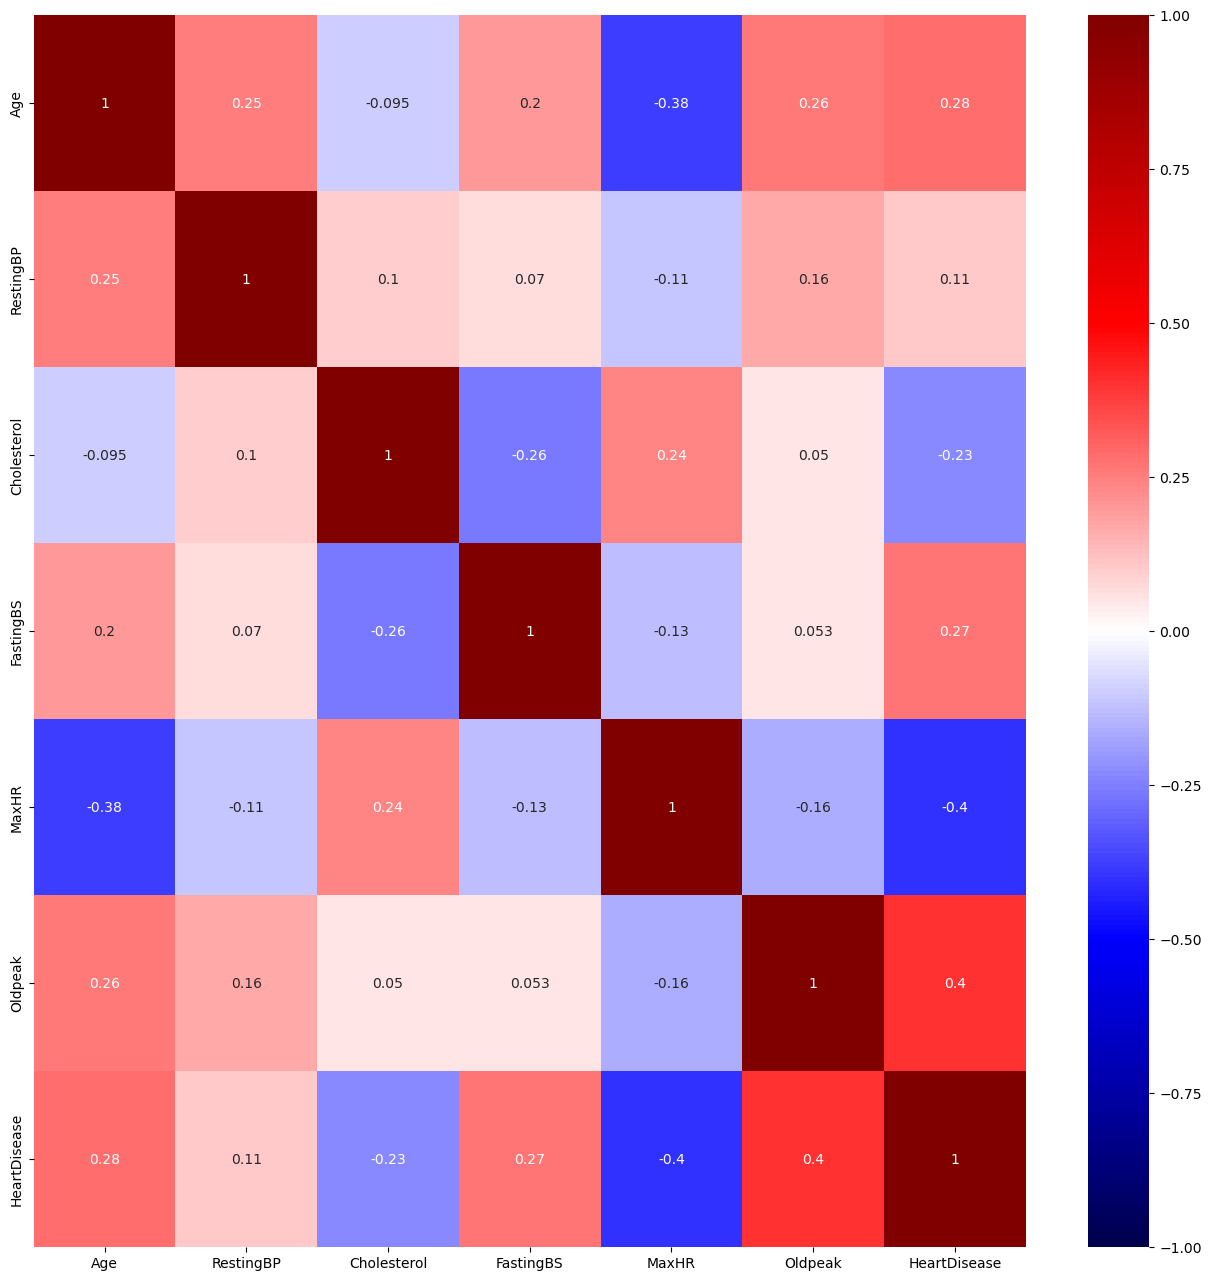

In [4]:
# create a heatmap plot
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark  because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. 

I noticed that a lot of data types are not numerical, so I will have to convert it to be numerical. 

In [5]:
# converting data type to be numerical
df['Sex'][df['Sex'] == 0] = 'female'
df['Sex'][df['Sex'] == 1] = 'male'
df['ChestPainType'][df['ChestPainType'] == 1] = 'typical angina'
df['ChestPainType'][df['ChestPainType'] == 2] = 'atypical angina'
df['ChestPainType'][df['ChestPainType'] == 3] = 'non-anginal pain'
df['ChestPainType'][df['ChestPainType'] == 4] = 'asymptomatic'
df['RestingECG'][df['RestingECG'] == 0] = 'normal'
df['RestingECG'][df['RestingECG'] == 1] = 'ST-T wave abnormality'
df['RestingECG'][df['RestingECG'] == 2] = 'left ventricular hypertrophy'
df['ExerciseAngina'][df['ExerciseAngina'] == 0] = 'Yes'
df['ExerciseAngina'][df['ExerciseAngina'] == 1] = 'No'
df['ST_Slope'][df['ST_Slope'] == 1] = 'upsloping'
df['ST_Slope'][df['ST_Slope'] == 2] = 'flat'
df['ST_Slope'][df['ST_Slope'] == 3] = 'downsloping'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df['Sex'] = df['Sex'].astype('object')
df['ChestPainType'] = df['ChestPainType'].astype('object')
df['RestingECG'] = df['RestingECG'].astype('object')
df['ExerciseAngina'] = df['ExerciseAngina'].astype('object')
df['ST_Slope'] = df['ST_Slope'].astype('object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Using 
get_dummies()function  which will return dummy-coded data. I use parameter drop_first = True, this will drop the first dummy variable, thus it will give n-1 dummies out of n discrete categorical levels by removing the first level.

In [9]:
#drop the first category
df = pd.get_dummies(df, drop_first=True)

In [10]:
#checkind columns
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [11]:
#checking info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

Looks grate, now I want to use Seabon.countplot to display the count of categorical observations in each bin in the dataset. A count plot resembles a histogram over a categorical variable as opposed to a quantitative one.

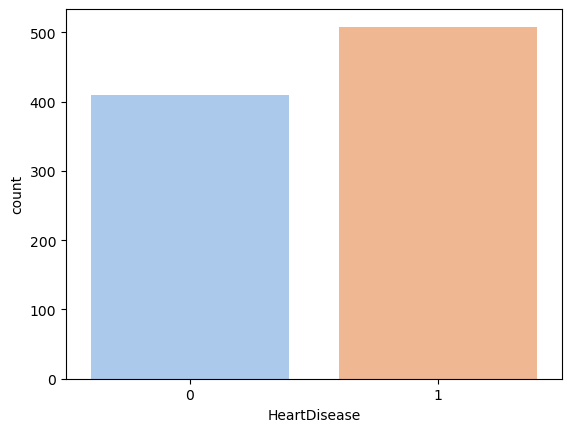

In [12]:
# Ploting countplot to compare people with and without disease 
sns.countplot(x="HeartDisease", data=df, palette="pastel")
plt.show()

Next, I want to see percentage of peaople with and without heart disease for that I will use len() function

In [13]:
without_disease = len(df[df.HeartDisease == 0])
with_disease = len(df[df.HeartDisease == 1])
print("Percent of people without Heart Disease: {:.2f}%".format((without_disease / (len(df.HeartDisease))*100)))
print("Percent of people with Heart Disease: {:.2f}%".format((with_disease / (len(df.HeartDisease))*100)))

Percent of people without Heart Disease: 44.66%
Percent of people with Heart Disease: 55.34%


Looks like we have 44.66% without Heart Disease and 55.34% with Heart Disease

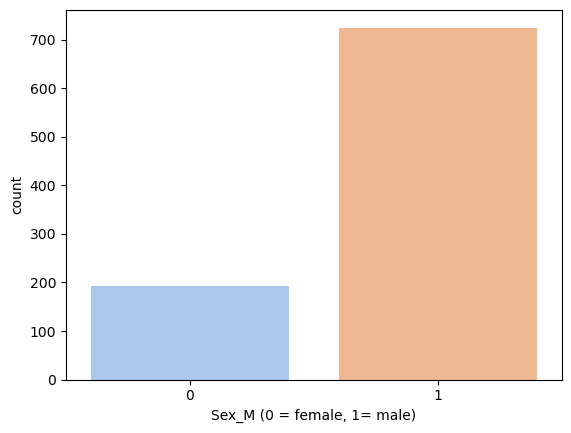

In [14]:
# Ploting countplot to compare gender of people  with heart disease 
sns.countplot(x='Sex_M', data=df, palette="pastel")
plt.xlabel("Sex_M (0 = female, 1= male)")
plt.show()

We can see that in our data set we have more males with heart disease then females. Let's check precentage

In [15]:
Female = len(df[df.Sex_M == 0])
Male = len(df[df.Sex_M == 1])
print("Female Proscentage: {:.2f}%".format((Female / (len(df.Sex_M))*100)))
print("Male Percentage: {:.2f}%".format((Male / (len(df.Sex_M))*100)))

Female Proscentage: 21.02%
Male Percentage: 78.98%


Using crosstab plot to see Number of patients with Heart Disease based on age where 0-no disease 1-with disease.

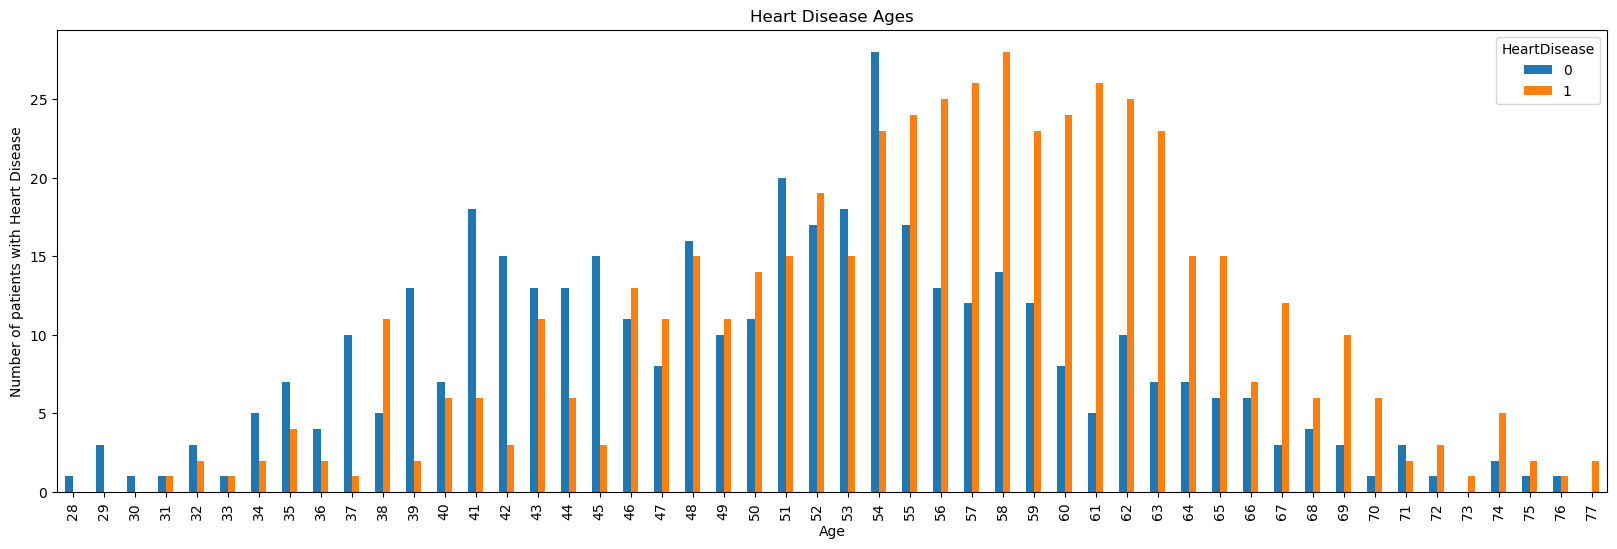

In [16]:
# plating crosstab plot
pd.crosstab(df.Age,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Ages')
plt.xlabel('Age')
plt.ylabel('Number of patients with Heart Disease')
plt.show()

Here I can see that  people have heart disease at the age of 50-65 it very rarely happens to young people.

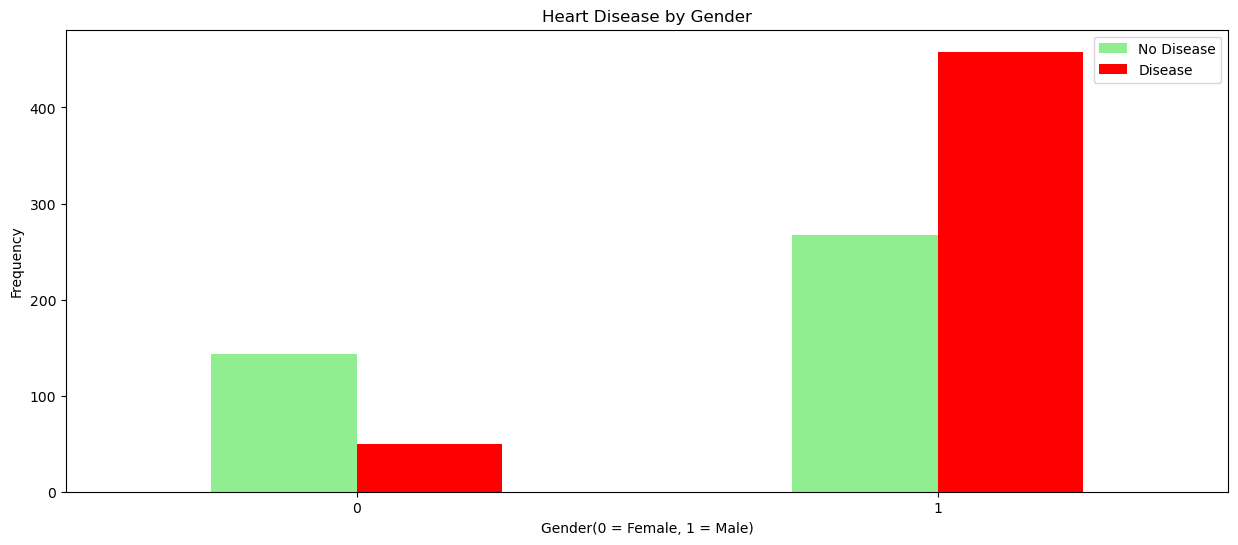

In [17]:
#ploting crosstab to see gender for people with and t=without heart disease
pd.crosstab(df.Sex_M,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=['lightgreen','red' ])
plt.title('Heart Disease by Gender')
plt.xlabel('Gender(0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

Here I can see again most female don't have a Heart disease but fot males there is a lot of cases with heart diseas. 

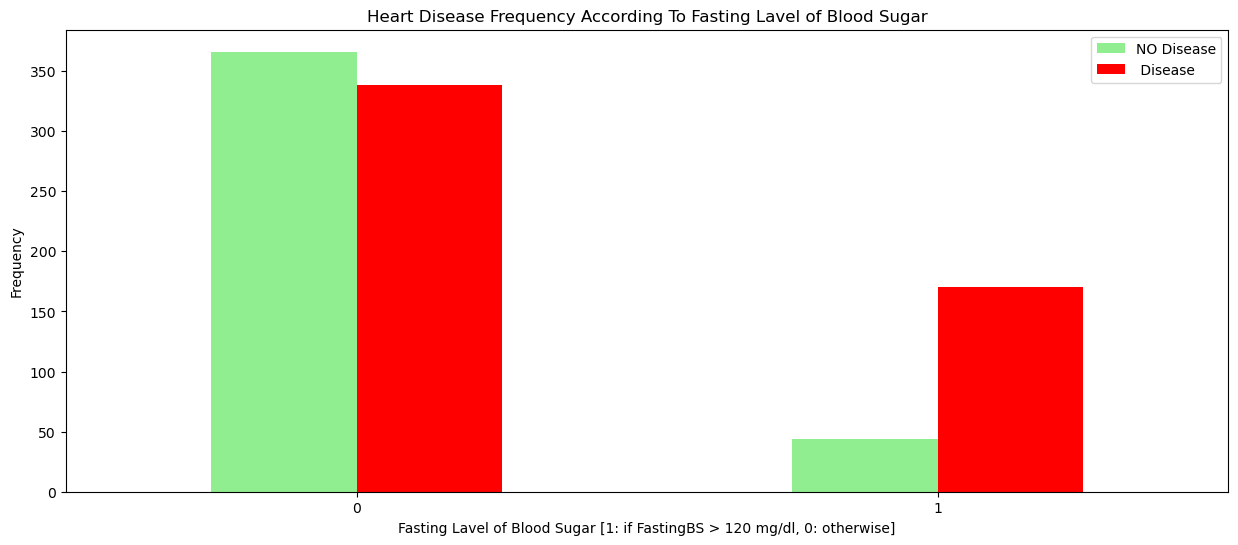

In [18]:
#Checking Heart Disease cases based on sugar lavel
pd.crosstab(df.FastingBS,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=["lightgreen","red" ])
plt.title('Heart Disease Frequency According To Fasting Lavel of Blood Sugar')
plt.xlabel('Fasting Lavel of Blood Sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]')
plt.xticks(rotation = 0)
plt.legend(["NO Disease", " Disease"])
plt.ylabel('Frequency')
plt.show()

If fasting Lavel of sugar more then 120 mg/dl people with heart disease almost 3 times more then without 

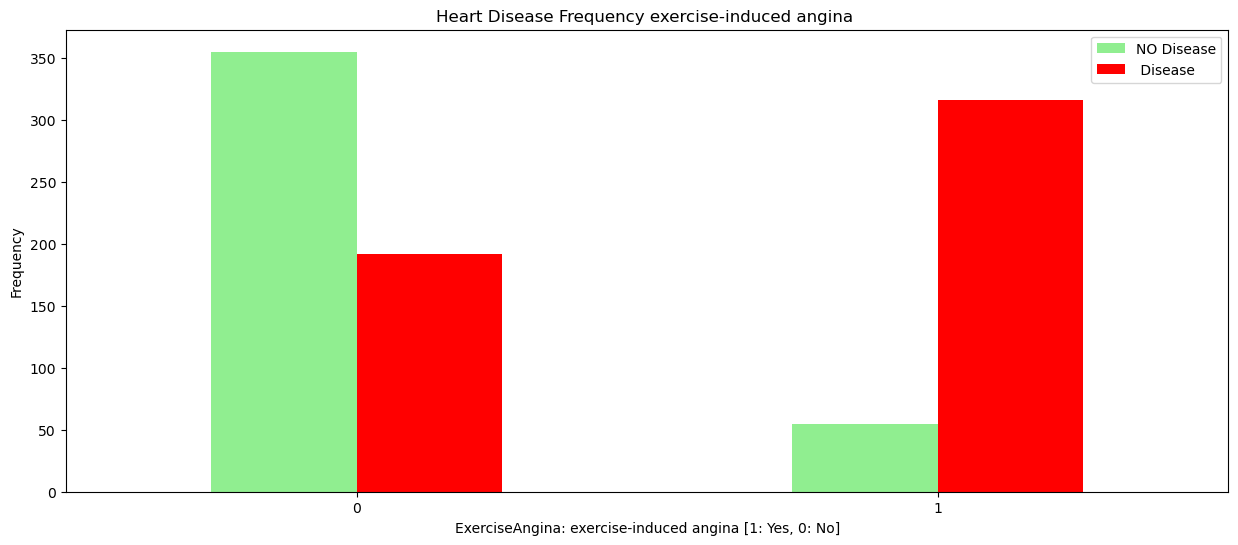

In [19]:
#Checking Heart Disease cases based on Exercise Angina
pd.crosstab(df.ExerciseAngina_Y,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=["lightgreen","red" ])
plt.title('Heart Disease Frequency exercise-induced angina ')
plt.xlabel('ExerciseAngina: exercise-induced angina [1: Yes, 0: No]')
plt.xticks(rotation = 0)
plt.legend(["NO Disease", " Disease"])
plt.ylabel('Frequency')
plt.show()

People with Angina defenatly have a risk to get Heart Disease 

# RANDOM Forest Algorithm

For the categorical varibles, we need to create dummy variables. I'm also going to drop the first category of each. For example, rather than having 'male' and 'female', we'll have 'male' with values of 0 or 1 (1 being male, and 0 therefore being female).

In [20]:
df = pd.get_dummies(df, drop_first=True)

In [21]:
#checking columns
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [22]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(df.drop('HeartDisease', 1),
                                                    df['HeartDisease'], test_size =
                                                    0.25, random_state=27)

In [23]:
# runing RandomForestClassifier
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [24]:
#evaluate the model
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [25]:
#Assess the fit with a confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[ 86,  18],
       [  7, 119]])

In [26]:
#checking the model using sensitivity and specificity
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9247311827956989
Specificity :  0.8686131386861314


Looks good

In [75]:
import sklearn
new_features=df[['Age','Sex_M','ChestPainType_ATA','ChestPainType_TA',
                       'ChestPainType_NAP','Cholesterol','RestingBP','MaxHR','RestingECG_Normal','RestingECG_ST',
                      'ExerciseAngina_Y']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [76]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [77]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.7554347826086957

<AxesSubplot:>

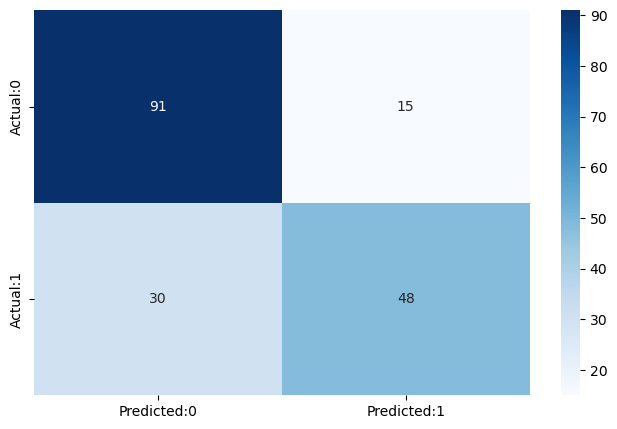

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")

True Positive(we predict our patient has Heart Disease and patient actually has it)-91

True Negative (we predict our patient does not have Heart Disease and patient actually has it)-48

False Positive(we predict our patient has Heart Disease and patient actually does not have it)-30

False Negative(we predict our patient does not have Heart Disease and patient actually has it)-15

# Modeling

In [27]:
# Split Data into Train and Test
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [28]:
#get dummies
df = pd.get_dummies(df, drop_first=True)

In [29]:
#Dividing dataset into features and Target variables
X= df.loc[:, "Age": "RestingBP"]
y = df["HeartDisease"]

In [30]:
# checking X
X.head()

,Age,RestingBP
0,40,140
1,49,160
2,37,130
3,48,138
4,54,150


In [31]:
# checking Y
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [32]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

Ratio Data is defined as quantitative data, having the same properties as interval data, with an equal and definitive ratio between each data and absolute “zero” being treated as a point of origin.

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64


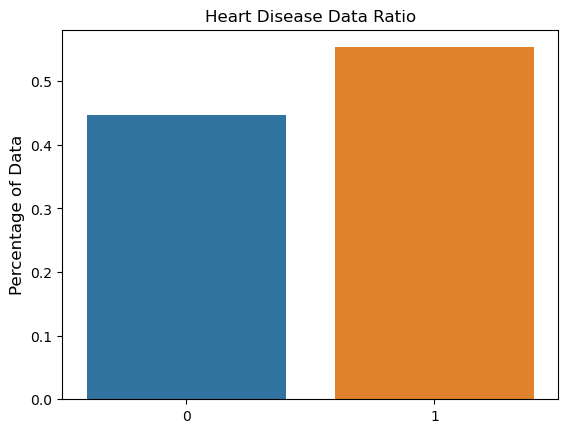

In [33]:
from sklearn.preprocessing import StandardScaler
target = df.HeartDisease.value_counts(normalize=True) 
print(target)
sns.barplot(target.index, target.values)
plt.title('Heart Disease Data Ratio')
plt.ylabel('Percentage of Data', fontsize=12);

Spliting data into Train and Test 

In [34]:
#split our data. 80% of our data will be train data and 20% of it will be test data.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)
X_train.shape, y_train.shape

((734, 2), (734,))

In [35]:
X_train_rs, y_train_rs = X_train, y_train

# Modiling

For modeling: I used logistic regration, random forest, decision tree, stacking resembling for setting on rendomforest as the model with the best cross-validation perfomance, random forest feature importance ranking I used for guiding the choice anf order of variables to be included as the model underwent refinement

### Random Forest option #2

A Gaussian classifier is a generative approach in the sense that it attempts to model class posterior as well as input class-conditional distribution. Therefore, we can generate new samples in input space with a Gaussian classifier.

In [36]:
#importing some more libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#creating a Gaussian Classifier
random_forest_clf=rfc = RandomForestClassifier(n_estimators=100, n_jobs = -1,class_weight={0:1, 1:3},random_state =50 , min_samples_leaf = 10)
rfc.fit(X_train_rs,y_train_rs)
y_pred_rfc = random_forest_clf.predict(X_test)

In [37]:
#checking Cross-Validation Accuracy Scores
scores = cross_val_score(random_forest_clf, X_train_rs, y_train_rs, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.58108108 0.55405405 0.59459459 0.59459459 0.60273973 0.5890411
 0.57534247 0.63013699 0.5890411  0.53424658]


Cross Validation is a very useful technique for assessing the effectiveness of your model, particularly in cases where you need to mitigate over-fitting

In [38]:
#Checking min, mean, and max score
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.5342465753424658, 0.5844872269529804, 0.6301369863013698)

In [39]:
#Checking Accurancy,Precision,Recall,and F1
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.6033 
 Precision: 0.6024 
 Recall: 0.9346 
 F1: 0.7326


Accuracy is a measure of how well a model is able to predict the correct output for a given input. It is usually expressed as a percentage

Precision defines how accurately a model can predict the true positive rate. It's calculated as the number of true positives divided by the total number of predicted positives

Recall measures the model’s ability to classify all positive examples. It is calculated by taking the correctly identified positives, over all the actual positives in our dataset. Note the difference here from precision is that precision takes into account the predicted positives and false positives, whereas recall takes into the total number of actual positives from our dataset.

The F1 score is the harmonic mean of precision and recall. In statistics, the harmonic mean is a type of average that is calculated by taking the reciprocal of the arithmetic mean of the reciprocals of a set of numbers. It is often used to average rates or ratios, such as speeds or grades.In the context of the F1 score, the harmonic mean is used to combine the precision and recall of a classifier into a single metric. The F1 score is defined as the harmonic mean of precision and recall, with a score of 1 being the best possible score and a score of 0 being the worst. The F1 score is often used as a balance between precision and recall.

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


It returned the values of training parameters that are explicitly specified by the user. If all parameters are used with their default values, this function returns an empty dict.

## Random Hyperparameter Grid

In [41]:
from sklearn.model_selection import RandomizedSearchCV

#Number of Trees in random forest
n_estimators= [int(x) for x in np.linspace(start =200, stop = 2000, num = 10)]

#Number of features to consider at every split 
max_features = ["auto", "sqrt"]

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110, num=11)]
max_depth.append(None)

#minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


bootstrap: If this is set as False, the whole dataset is used to build each tree, but it is set as Default.

max_depth: The maximum depth of the tree - meaning the longest path between the root node and the leaf node.

max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”}
A Random Forest model can only have a maximum number of features in an individual tree. Many would assume that if you increase max_features, this will improve the overall performance of your model. However, this naturally decreases the diversity of individual trees which would also increase the time it took the model to produce outputs. Therefore, finding an optimal max_features is important to your model's performance.

min_samples_leaf: This is the minimum number of samples required to be at a leaf node where the default = 1

min_samples_leaf: This is the minimum number of samples required to be at a leaf node where the default = 1

n_estimators : int, default=100
This is the number of trees in the forest. As mentioned before, with an increase in the number of trees, the precision of the outcome increases - therefore better accuracy, and overfitting is reduced. However, this will make your model slower - therefore choosing an n_estimator value which your processor can handle allows your model to be more stable and perform well.

## Random Seach Training

In [42]:
# Using the random grod to search for best hyperparameters
#First creating the base model to tune
rf = RandomForestRegressor()

#Random search of parameters, using 3 fold cross validation 
#Searching across 100 different combinations, and using all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                              n_iter = 75,
                              cv=3,
                              verbose =2,
                              random_state =42,
                              n_jobs = -1)

#Fit the random search model
rf_random.fit(X_train_rs, y_train_rs)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=75,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [43]:
#View the best Paramters from fitting the Random Search
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

Now, I know the best Paramters from fitting the Random Search I will fit it into X_train_rs, y_train_rs and make my prediction model

In [45]:
random_forest_clf=  RandomForestClassifier(n_estimators= 800,
                                           min_samples_split= 10,
                                           min_samples_leaf= 4,
                                           max_features= 'sqrt',
                                           max_depth= 50,
                                           bootstrap= True)
random_forest_clf.fit(X_train_rs, y_train_rs)
y_pred_rfc = random_forest_clf.predict(X_test)

In [46]:
#Checcking accurancy,precision,recall, and F1
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.6141 
 Precision: 0.6636 
 Recall: 0.6822 
 F1: 0.6728


Here I can see not so good score. Recall is 68%

In [47]:
# Checking Cross-Validation Accuracy Scores
scores = cross_val_score(random_forest_clf, X_train_rs, y_train_rs, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.58503401 0.6462585  0.65986395 0.65306122 0.60273973]


In [48]:
# hecking min, mean, and max scores
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.5850340136054422, 0.6293914826204453, 0.6598639455782312)

### Second option 

In [49]:
random_forest_clf=  RandomForestClassifier(n_estimators= 800,
                                           class_weight="balanced",
                                           min_samples_split= 10,
                                           min_samples_leaf= 4,
                                           max_features= 'sqrt',
                                           max_depth= 50,
                                           bootstrap= True)
random_forest_clf.fit(X_train_rs, y_train_rs)
y_pred_rfc = random_forest_clf.predict(X_test)

In [50]:
print("confusion matrix: \n\n", 
      confusion_matrix[y_test, y_pred_rfc])

print(classification_report(y_test, y_pred_rfc))

confusion matrix: 

 [  7  18   7   7  18  86  86  86  86  86   7  18 119   7  18 119 119   7
   7  86   7   7 119 119  86  86 119 119  86  18   7  86  86  18 119  86
 119  18 119  86  18   7   7  18 119  86  18   7 119   7   7  86  18   7
 119  86   7  18 119  86   7   7   7  18   7 119   7   7 119  86 119   7
 119 119 119   7 119  86   7  86  86   7  18  18 119  86  86   7 119  18
  86 119  86   7 119  86 119  86  18  86 119 119  18   7 119   7  86  86
  86 119  86 119  86 119 119   7 119  86 119   7 119 119 119  86  86 119
  86   7  18 119 119 119  18 119 119   7  18 119  86  86 119 119  18   7
  18  86 119 119   7 119   7 119  18  86  86  18 119 119 119  86 119   7
 119  18 119  18 119  18 119 119 119   7  86  86   7  18  18 119  18 119
 119   7  86 119]
              precision    recall  f1-score   support

           0       0.52      0.60      0.56        77
           1       0.68      0.61      0.64       107

    accuracy                           0.60       184
   macro avg 

In [51]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.6033 
 Precision: 0.6771 
 Recall: 0.6075 
 F1: 0.6404


This model is even worse Recall is 61%

In [52]:
scores = cross_val_score(random_forest_clf, X_train_rs, y_train_rs, cv=5)
print('Cross-Validation Accuracy Scores', scores)


Cross-Validation Accuracy Scores [0.57823129 0.66666667 0.6462585  0.63945578 0.60958904]


In [53]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.5782312925170068, 0.62804025719877, 0.6666666666666666)

### The third oprion

In [54]:
random_forest_clf=  RandomForestClassifier(n_estimators= 800,
                                           class_weight="balanced_subsample",
                                           min_samples_split= 10,
                                           min_samples_leaf= 4,
                                           max_features= 'sqrt',
                                           max_depth= 50,
                                           bootstrap= True)
random_forest_clf.fit(X_train_rs, y_train_rs)
y_pred_rfc = random_forest_clf.predict(X_test)

In [55]:
print("confusion matrix: \n\n", 
      confusion_matrix[y_test, y_pred_rfc])

print(classification_report(y_test, y_pred_rfc))

confusion matrix: 

 [  7  18   7   7  18  86  86  86  86  86   7  18 119   7  18 119 119   7
   7  86   7   7 119 119  86  86 119 119  86  18   7  86  86  18 119  86
 119  18 119  86  18   7   7  18 119  86  18   7 119   7   7  86  18   7
 119  86   7  18 119  86   7   7   7  18   7 119   7   7 119  86 119   7
 119 119 119   7 119  86   7  86  86   7  18  18 119  86  86   7 119  18
  86 119  86   7 119  86 119  86  18  86 119 119  86   7   7   7  86  86
  86 119  86 119  86 119 119 119 119  86 119   7 119 119 119  86  86 119
  86   7  18 119 119 119  18 119 119   7  18 119  86  86 119 119  18   7
  18  86 119 119   7 119   7 119  18  86  86  18 119 119 119  86 119   7
 119  18 119  18 119  18 119 119 119   7  86  86   7  18  18 119  18 119
 119   7  86 119]
              precision    recall  f1-score   support

           0       0.53      0.61      0.57        77
           1       0.68      0.61      0.64       107

    accuracy                           0.61       184
   macro avg 

In [56]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.6087 
 Precision: 0.6842 
 Recall: 0.6075 
 F1: 0.6436


This model is also not good only 61%

In [57]:

scores = cross_val_score(random_forest_clf, X_train_rs, y_train_rs, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.57142857 0.65986395 0.6462585  0.63945578 0.60273973]


In [58]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.5714285714285714, 0.623949305749697, 0.6598639455782312)

### The fourth option

In [59]:
random_forest_clf=  RandomForestClassifier(n_estimators= 800,
                                           class_weight={0:1, 1:3.5},
                                           min_samples_split= 10,
                                           min_samples_leaf= 4,
                                           max_features= 'sqrt',
                                           max_depth= 50,
                                           bootstrap= True)
random_forest_clf.fit(X_train_rs, y_train_rs)
y_pred_rfc = random_forest_clf.predict(X_test)

In [60]:
print("confusion matrix: \n\n", 
      confusion_matrix[y_test, y_pred_rfc])

print(classification_report(y_test, y_pred_rfc))

confusion matrix: 

 [119  18 119 119  18  86  18  18  18  18 119  18 119 119  18 119 119 119
   7  18 119   7 119 119  18  86 119 119  18  18 119  86  18  18 119  86
 119  18 119  86  18 119 119  18 119  86  18 119 119 119 119  18  18 119
 119  18   7  18 119  86 119 119 119  18 119 119 119 119 119  18 119   7
 119 119 119   7 119  18 119  18  18   7  18  18 119  18  18   7 119  18
  18 119  18 119 119  86 119  18  18  18 119 119  18 119 119   7  86  18
  86 119  18 119  18 119 119 119 119  18 119   7 119 119 119  18  86 119
  18   7  18 119 119 119  18 119 119 119  18 119  18  86 119 119  18 119
  18  18 119 119   7 119 119 119  18  86  18  18 119 119 119  18 119   7
 119  18 119  18 119  18 119 119 119 119  18  86 119  18  18 119  18 119
 119 119  86 119]
              precision    recall  f1-score   support

           0       0.56      0.19      0.29        77
           1       0.61      0.89      0.72       107

    accuracy                           0.60       184
   macro avg 

In [61]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.5978 
 Precision: 0.6051 
 Recall: 0.8879 
 F1: 0.7197


Finaly model #4 shows me a good score for Recall wich is 89%

In [62]:

scores = cross_val_score(random_forest_clf, X_train_rs, y_train_rs, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.55405405 0.52702703 0.62162162 0.62162162 0.64383562 0.60273973
 0.57534247 0.61643836 0.60273973 0.5890411 ]


In [63]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.527027027027027, 0.5954461310625694, 0.6438356164383562)

# Evaluation

Next, I will check feature importance

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
random_forest_clf.feature_importances_

array([0.57071598, 0.42928402])

Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable

In [65]:
#Test Scores on Holdout
random_forest_clf.fit(X_test, y_test)
random_forest_clf.score(X_test, y_test)

0.7282608695652174

 ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points.

ROC AUC score =  0.8927661123922805


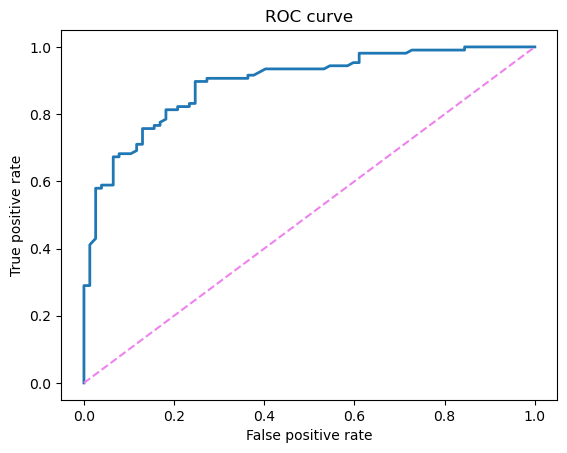

In [66]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, random_forest_clf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, random_forest_clf.predict_proba(X_test)[:,1]))

score of 0.9 means the classifier can almost perfectly distinguish between all the Positive and the Negative class points.

In [67]:
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(random_forest_clf, threshold=0.5):
    # Predicting class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (random_forest_clf.predict_proba(X_test)[:, 1] >= threshold)
    HeartDisease_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(HeartDisease_confusion, cmap=plt.cm.BuGn, annot=True, square=True, fmt='d',
           xticklabels=['No HeartDisease', 'HeartDisease'],
           yticklabels=['No HeartDisease', 'HeartDisease']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

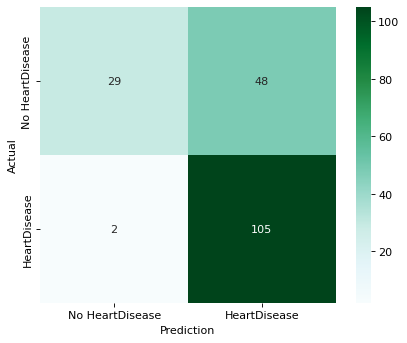

In [68]:
make_confusion_matrix(random_forest_clf)

True Positive(we predict our patient has Heart Disease and patient actually has it)-29

True Negative (we predict our patient does not have Heart Disease and patient actually has it)-105

False Positive(we predict our patient has Heart Disease and patient actually does not have it)-2

False Negative(we predict our patient does not have Heart Disease and patient actually has it)-48

# Conclusions

The whole dataset was aplit into 80/20 train/holdout. Prediction on 20% holdout were limited till the end. 

Mens getting Heart Disease much more often the females. Also we can see that age plays a large role in the development of Heart Disease.

My model predicted with  

Accuracy: 0.5978 

Precision: 0.6051 

Recall: 0.8879 

F1: 0.7197

Where Accuracy is a measure of how well a model is able to predict the correct output for a given input. It is usually expressed as a percentage

Precision defines how accurately a model can predict the true positive rate. It's calculated as the number of true positives divided by the total number of predicted positives

Recall measures the model’s ability to classify all positive examples. It is calculated by taking the correctly identified positives, over all the actual positives in our dataset. Note the difference here from precision is that precision takes into account the predicted positives and false positives, whereas recall takes into the total number of actual positives from our dataset.

The F1 score is the harmonic mean of precision and recall. In statistics, the harmonic mean is a type of average that is calculated by taking the reciprocal of the arithmetic mean of the reciprocals of a set of numbers. It is often used to average rates or ratios, such as speeds or grades.In the context of the F1 score, the harmonic mean is used to combine the precision and recall of a classifier into a single metric. The F1 score is defined as the harmonic mean of precision and recall, with a score of 1 being the best possible score and a score of 0 being the worst. The F1 score is often used as a balance between precision and recall.

The Area under the ROC curve is 0.89 which is good score.

 Overall model could be improved with more data.

## Next Step

My next step would be to continue with developing model for better result. Use more data for better prediction.